# **Importing Libraries**

In [ ]:
%pip intall ultralytics -q

In [50]:
%pip install roboflow -q

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\Users\\aswin\\miniconda3\\envs\\ml\\Lib\\site-packages\\cv2\\cv2.pyd'
Consider using the `--user` option or check the permissions.



In [9]:
import cv2
import numpy as np
import onnx
import onnxruntime as ort
from openvino.runtime import Core
import matplotlib.pyplot as plt
import os
import random
import json
from ultralytics import YOLO
from PIL import Image, ImageDraw
from roboflow import Roboflow

c:\Users\aswin\miniconda3\envs\ml\Lib\site-packages\openvino\runtime\__init__.py:10: DeprecationWarning: The `openvino.runtime` module is deprecated and will be removed in the 2026.0 release. Please replace `openvino.runtime` with `openvino`.
  warnings.warn(


# **Court Detection Model Setup - Single Frame**

In [ ]:
%cd "C:\Users\aswin\OneDrive\Desktop\Sandbox\bb_homography"

C:\Users\aswin\OneDrive\Desktop\Sandbox\bb_homography


In [ ]:
rf = Roboflow(api_key="KH0bddJZf8vYLHaRu9eP")
project = rf.workspace("roboflow-jvuqo").project("basketball-court-detection-2")
version = project.version(13)
dataset = version.download("yolov8")  

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to basketball-court-detection-2-13 in yolov8:: 100%|██████████| 2452/2452 [00:01<00:00, 1474.15it/s]


**Loading And Running Court Keypoint Model**

In [5]:
# Load the YOLO model
court_model = YOLO(r'C:\Users\aswin\OneDrive\Desktop\Sandbox\bb_homography\Models\court_model\weights\best.pt')

In [6]:
# Run validation on your dataset
results = court_model.val(data=r'C:\Users\aswin\OneDrive\Desktop\Sandbox\bb_homography\Datasets\basketball-court-detection-2-13\data.yaml')

# Print metrics summary
print(results)

Ultralytics 8.3.176  Python-3.13.5 torch-2.8.0+cpu CPU (AMD Ryzen 7 8845HS w/ Radeon 780M Graphics)
YOLO11l-pose summary (fused): 199 layers, 26,715,484 parameters, 0 gradients, 93.0 GFLOPs
val: Fast image access  (ping: 0.00.0 ms, read: 135.075.8 MB/s, size: 78.9 KB)


val: Scanning C:\Users\aswin\OneDrive\Desktop\Sandbox\bb_homography\Datasets\basketball-court-detection-2-13\valid\labels.cache... 113 images, 0 backgrounds, 0 corrupt: 100%|██████████| 113/113 [00:00<?, ?it/s]
c:\Users\aswin\miniconda3\envs\ml\Lib\site-packages\torch\utils\data\dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:46<00:00,  5.81s/it]


                   all        113        113          1          1      0.995       0.94      0.947      0.947      0.954       0.84
Speed: 0.9ms preprocess, 395.2ms inference, 0.0ms loss, 0.4ms postprocess per image
Results saved to runs\pose\val4
ultralytics.utils.metrics.PoseMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000001FC02C92060>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(P)', 'F1-Confidence(P)', 'Precision-Confidence(P)', 'Recall-Confidence(P)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,  

In [ ]:
# Path to the image
image_path = 'C:/Users/aswin/OneDrive/Desktop/Sandbox/bb_homography/Datasets/basketball-court-detection-2-13/test/images/boston-celtics-new-york-knicks-game-1-q1-04_28-04_20_mp4-0002_jpg.rf.db394ecbed6b200bb2ba27fa3bd9fc95.jpg'

with Image.open(image_path) as img:
    # Resize image
    resized_img = img.resize((640, 640))
results = court_model(resized_img)[0]

print(results)


0: 640x640 1 court, 342.2ms
Speed: 3.3ms preprocess, 342.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: ultralytics.engine.results.Keypoints object
masks: None
names: {0: 'court'}
obb: None
orig_img: array([[[176, 152, 146],
        [171, 148, 146],
        [160, 139, 141],
        ...,
        [ 29,  27,  33],
        [ 10,   8,  14],
        [ 14,  12,  18]],

       [[168, 143, 139],
        [180, 157, 155],
        [172, 151, 153],
        ...,
        [ 27,  25,  31],
        [ 10,   8,  14],
        [ 14,  12,  18]],

       [[170, 148, 143],
        [179, 158, 156],
        [157, 139, 140],
        ...,
        [ 25,  23,  29],
        [  9,   7,  13],
        [ 15,  13,  19]],

       ...,

       [[124, 177, 240],
        [116, 169, 232],
        [118, 171, 234],
        ...,
        [100, 106, 135],
        [ 90,  97, 124],
        [ 23,

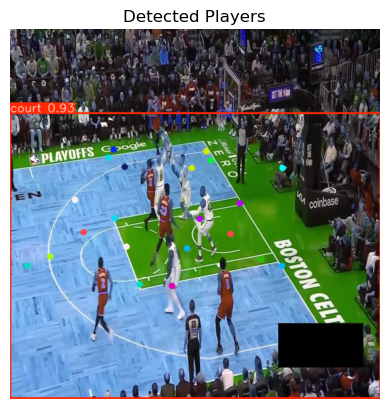

In [13]:
img_players = results.plot()  # returns an image array with masks, boxes, labels
plt.imshow(img_players)
plt.axis('off')
plt.title("Detected Players")
plt.show()

# **Homography Mapping - Single Frame Input**

**Step 1 - Setting Up required keypoints for Model Map**

Figuring Out Keypoint Locations/Labels

In [ ]:
# Show the keypoints with labels

file_name = r'C:\Users\aswin\OneDrive\Desktop\Sandbox\bb_homography\Assets\basketball court.png'
frame_pil = Image.open(file_name).resize((640, 640)).convert("RGB")
frame = cv2.cvtColor(np.array(frame_pil), cv2.COLOR_RGB2BGR)

# Run inference
preds = court_model(frame)[0]

# Extract keypoints
keypoints = preds.keypoints.data[0].cpu().numpy()  # shape: (num_keypoints, 3)

# Draw keypoints
for i, (x, y, v) in enumerate(keypoints):
    if v > 0.5:
        px = int(x)
        py = int(y)
        cv2.circle(frame, (px, py), 6, (0, 255, 0), -1)
        cv2.putText(frame, str(i), (px + 5, py - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
frame_final = Image.fromarray(frame_rgb)
frame_final.show()


0: 640x640 1 court, 444.6ms
Speed: 4.8ms preprocess, 444.6ms inference, 25.6ms postprocess per image at shape (1, 3, 640, 640)


In [ ]:
# Running Inference with Keypoints to make Homography Mapping

train_images_dir = r'C:\Users\aswin\OneDrive\Desktop\Sandbox\bb_homography\Datasets\basketball-court-detection-2-13\train\images'
train_labels_dir = r'C:\Users\aswin\OneDrive\Desktop\Sandbox\bb_homography\Datasets\basketball-court-detection-2-13\train\labels'
output_dir = r'C:\Users\aswin\OneDrive\Desktop\Sandbox\bb_homography\Datasets\keypoint_names_identifier'

# Create output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Random sample of 50 images
image_files = [f for f in os.listdir(train_images_dir) if f.endswith((".jpg", ".png"))]
subset = random.sample(image_files, min(50, len(image_files)))

def draw_keypoints(image_path, label_path, save_path):
    img = cv2.imread(image_path)
    if img is None:
        print(f"[ERROR] Cannot read image: {image_path}")
        return

    h, w = img.shape[:2]

    with open(label_path, 'r') as f:
        line = f.readline().strip()
        parts = list(map(float, line.split()))

    if len(parts) < 8:
        print(f"[WARNING] Not enough data in label: {label_path}")
        return

    # Skip: class_id, bbox_center_x, bbox_center_y, bbox_width, bbox_height
    keypoint_data = parts[5:]

    if len(keypoint_data) % 3 != 0:
        print(f"[WARNING] Keypoint triplet misalignment in: {label_path}")
        return

    for i in range(0, len(keypoint_data), 3):
        x, y, v = keypoint_data[i:i+3]
        if int(v) == 2:
            px = int(x * w)
            py = int(y * h)
            cv2.circle(img, (px, py), 5, (0, 255, 0), -1)
            cv2.putText(img, str(i // 3), (px + 4, py - 4),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1)

    cv2.imwrite(save_path, img)
    print(f"[✓] Saved: {save_path}")

# --- Process 50 images ---
for file in subset:
    img_path = os.path.join(train_images_dir, file)
    label_path = os.path.join(train_labels_dir, os.path.splitext(file)[0] + ".txt")

    if os.path.exists(label_path):
        out_path = os.path.join(output_dir, file)
        draw_keypoints(img_path, label_path, out_path)
    else:
        print(f"[WARNING] Missing label for {file}")

[✓] Saved: C:\Users\aswin\OneDrive\Desktop\Sandbox\bb_homography\Datasets\keypoint_names_identifier\los-angeles-lakers-minnesota-timberwolve-game-3-q1-10_56-10_49_mp4-0004_jpg.rf.21a98cca236f614f44bbcab747904192.jpg
[✓] Saved: C:\Users\aswin\OneDrive\Desktop\Sandbox\bb_homography\Datasets\keypoint_names_identifier\cleveland-cavaliers-indiana-pacers-game-2-q1-03_38-03_32_mp4-0004_jpg.rf.2615e99895259487c287eabc601c068e.jpg
[✓] Saved: C:\Users\aswin\OneDrive\Desktop\Sandbox\bb_homography\Datasets\keypoint_names_identifier\minnesota-timberwolves-oklahoma-city-thunder-game-1-1-q2-03_48-03_41_mp4-0004_jpg.rf.66015276e7ed983d4356e83829fde2dd.jpg
[✓] Saved: C:\Users\aswin\OneDrive\Desktop\Sandbox\bb_homography\Datasets\keypoint_names_identifier\denver-nuggets-los-angeles-clippers-game-1-q1-09_52-09_44_mp4-0004_jpg.rf.e315a008980e5a3d5d98b55ea3b9a6fd.jpg
[✓] Saved: C:\Users\aswin\OneDrive\Desktop\Sandbox\bb_homography\Datasets\keypoint_names_identifier\denver-nuggets-los-angeles-clippers-game-

Obtaining Exact Coordinates of Keypoints on "To Be Plotted" Court

In [ ]:
# ==== CONFIGURING HOMOGRAPHY MAP ====
image_path = r'C:\Users\aswin\OneDrive\Desktop\Sandbox\bb_homography\Assets\full-court.jpeg'
output_json = r'C:\Users\aswin\OneDrive\Desktop\Sandbox\bb_homography\homography_config.json'
side = "right"  # "left", "right", or "center" - Switch and get coordinates for different sides

# ==== MASTER KEYPOINT LABELS ====
all_keypoint_labels = [
    "Left Top Left",                # 0
    "Left 3P Top Left",             # 1
    "Left FT Top Corner",           # 2
    "Left FT Bottom Corner",        # 3
    "Left 3P Bottom Left",          # 4
    "Left Bottom Left",             # 5
    "Left Under Basket",            # 6
    "Left 3P Top Side",             # 7
    "Left 3P Bottom Side",          # 8
    "Left FT Above",                # 9
    "Left FT",                      # 10
    "Left FT Below",                # 11
    "Left Above 3P",                # 12
    "Left 3P",                      # 13
    "Left Below 3P",                # 14
    "Center Top",                   # 15
    "Center",                       # 16
    "Center Bottom",                # 17
    "Right Above 3P",               # 18
    "Right 3P",                     # 19
    "Right Below 3P",               # 20
    "Right FT Above",               # 21
    "Right FT",                     # 22
    "Right FT Below",               # 23
    "Right 3P Top Side",            # 24
    "Right 3P Bottom Side",         # 25
    "Right Under Basket",           # 26
    "Right Top Right",              # 27
    "Right 3P Top Right",           # 28
    "Right FT Top Corner",          # 29
    "Right FT Bottom Corner",       # 30
    "Right 3P Bottom Right",        # 31
    "Right Bottom Right"            # 32
]

# ==== SIDE-SPECIFIC INDICES ====
side_keypoints = {
    "left": list(range(0, 15)),
    "center": list(range(15, 18)),
    "right": list(range(18, 33))
}

# ==== Validate side ====
if side not in side_keypoints:
    raise ValueError(f"Invalid side '{side}'. Choose from 'left', 'center', or 'right'.")

keypoint_indices = side_keypoints[side]
keypoint_names = [f"{all_keypoint_labels[i]} ({i})" for i in keypoint_indices]

# ==== Click Handler ====
clicked_points = []

def click_event(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        idx = len(clicked_points)
        if idx < len(keypoint_indices):
            label = keypoint_names[idx]
            print(f"Point {label}: ({x}, {y})")
            clicked_points.append([x, y])
            cv2.circle(img, (x, y), 5, (0, 0, 255), -1)
            cv2.putText(img, f"{keypoint_indices[idx]}", (x+5, y-5), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0,255,0), 2)
            cv2.imshow("Click keypoints", img)
        else:
            print("✅ All points collected. Press ESC to save and exit.")

# ==== Load Image ====
img = cv2.imread(image_path)
if img is None:
    raise FileNotFoundError(f"Image not found at {image_path}")

cv2.imshow("Click keypoints", img)
cv2.setMouseCallback("Click keypoints", click_event)

print(f"🖱️ Click the following keypoints in order for the {side.upper()} side:")
for i, name in enumerate(keypoint_names):
    print(f"{i+1}. {name}")

cv2.waitKey(0)
cv2.destroyAllWindows()

# ==== Save to JSON ====
if len(clicked_points) != len(keypoint_indices):
    print("❌ Not enough points clicked. Aborting save.")
else:
    if os.path.exists(output_json):
        with open(output_json, "r") as f:
            data = json.load(f)
    else:
        data = {}

    if "dst_pts" not in data:
        data["dst_pts"] = {}

    data["dst_pts"][side] = clicked_points

    with open(output_json, "w") as f:
        json.dump(data, f, indent=2)

    print(f"✅ Saved {len(clicked_points)} points under 'dst_pts' → '{side}' in {output_json}")


🖱️ Click the following keypoints in order for the RIGHT side:
1. Right Above 3P (18)
2. Right 3P (19)
3. Right Below 3P (20)
4. Right FT Above (21)
5. Right FT (22)
6. Right FT Below (23)
7. Right 3P Top Side (24)
8. Right 3P Bottom Side (25)
9. Right Under Basket (26)
10. Right Top Right (27)
11. Right 3P Top Right (28)
12. Right FT Top Corner (29)
13. Right FT Bottom Corner (30)
14. Right 3P Bottom Right (31)
15. Right Bottom Right (32)
Point Right Above 3P (18): (419, 34)
Point Right 3P (19): (417, 181)
Point Right Below 3P (20): (419, 331)
Point Right FT Above (21): (469, 135)
Point Right FT (22): (468, 182)
Point Right FT Below (23): (469, 230)
Point Right 3P Top Side (24): (513, 55)
Point Right 3P Bottom Side (25): (520, 312)
Point Right Under Basket (26): (549, 181)
Point Right Top Right (27): (583, 31)
Point Right 3P Top Right (28): (583, 52)
Point Right FT Top Corner (29): (582, 134)
Point Right FT Bottom Corner (30): (583, 231)
Point Right 3P Bottom Right (31): (580, 311)
Poi

**Step 2: Configuring fixed keypoints of the model map**

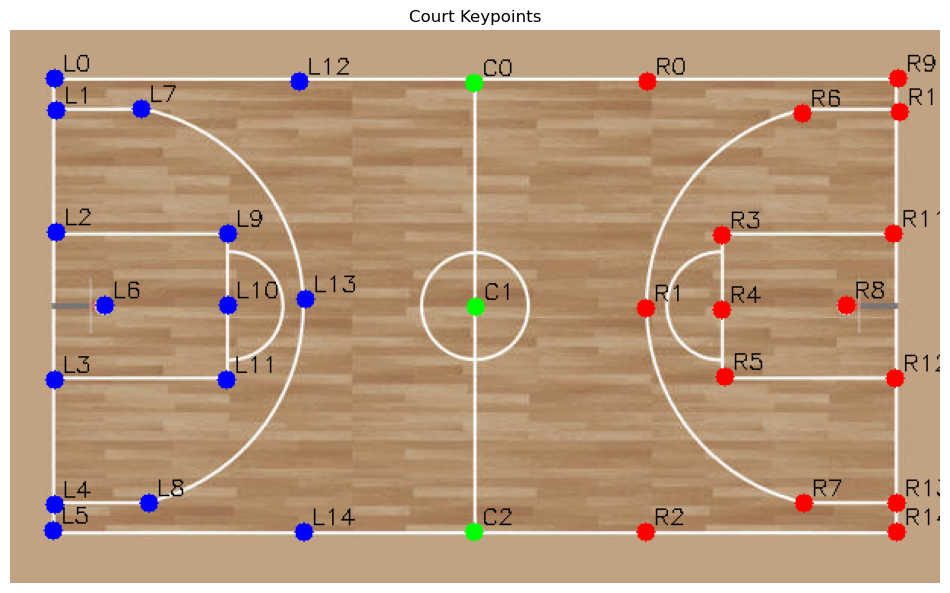

In [ ]:
# Confirming Keypoints Plotting
# === Load court map ===
court_map = cv2.imread(r'C:\Users\aswin\OneDrive\Desktop\Sandbox\bb_homography\Assets\full-court.jpeg')
court_map = cv2.resize(court_map, (612, 364))

# === Destination keypoints (top-down reference) ===
scale_x = 1 # 0.8      # 640 / 800
scale_y = 1 # 640 / 480  # = 1.3333


dst_pts = {
    "left": np.array([[29.0, 32.0], [30.0, 53.0], [30.0, 133.0], [29.0, 230.0], [29.0, 312.0], [28.0, 329.0], [62.0, 181.0], [86.0, 52.0], [91.0, 311.0], [143.0, 134.0], [143.0, 181.0], [142.0, 230.0], [190.0, 34.0], [194.0, 177.0], [193.0, 330.0]], dtype=np.float32),
    "right": np.array([[419.0, 34.0], [418.0, 183.0], [418.0, 330.0], [468.0, 135.0], [468.0, 184.0], [470.0, 228.0], [521.0, 55.0], [522.0, 311.0], [550.0, 181.0], [584.0, 32.0], [585.0, 54.0], [581.0, 134.0], [582.0, 229.0], [583.0, 311.0], [583.0, 330.0]], dtype=np.float32),
    "center": np.array([[305.0, 35.0], [306.0, 182.0], [305.0, 330.0]], dtype=np.float32),
}


LEFT_INDICES   = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
RIGHT_INDICES  = [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]
CENTER_INDICES = [15, 16, 17]

labels = [
    "Left Top Left", "Left 3P Top Left", "Left FT Top Corner", "Left FT Bottom Corner",
    "Left 3P Bottom Left", "Left Bottom Left", "Left Under Basket", "Left 3P Top Side",
    "Left 3P Bottom Side", "Left FT Above", "Left FT", "Left FT Below",
    "Left Above 3P", "Left 3P", "Left Below 3P", "Center Top", "Center", "Center Bottom",
    "Right Above 3P", "Right 3P", "Right Below 3P", "Right FT Above", "Right FT", "Right FT Below",
    "Right 3P Top Side", "Right 3P Bottom Side", "Right Under Basket", "Right Top Right",
    "Right 3P Top Right", "Right FT Top Corner", "Right FT Bottom Corner",
    "Right 3P Bottom Right", "Right Bottom Right"
]
# Colors for each section
colors = {
    "left": (255, 0, 0),
    "right": (0, 0, 255),
    "center": (0, 255, 0)
}

# Plot the points
for section, pts in dst_pts.items():
    for idx, (x, y) in enumerate(pts):
        x, y = int(x), int(y)
        cv2.circle(court_map, (x, y), 6, colors[section], -1)
        cv2.putText(court_map, f"{section[0].upper()}{idx}", (x + 5, y - 5),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1)

# Show the result using matplotlib
plt.figure(figsize=(12, 8))
plt.imshow(cv2.cvtColor(court_map, cv2.COLOR_BGR2RGB))
plt.title("Court Keypoints")
plt.axis('off')
plt.show()

**Step 3: Loading models**

In [ ]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"  # To avoid OpenMP library loading issue

# === Load models ===
court_model = YOLO(r'C:\Users\aswin\OneDrive\Desktop\Sandbox\bb_homography\Models\court_model\weights\best.pt')
player_model = YOLO(r'C:\Users\aswin\OneDrive\Desktop\Sandbox\bb_homography\Models\playerbox_model_optimal\weights\best.pt')

**Step 4: Running Homography Functions - Single Frames**

In [ ]:
def detect_side(kpts, confs, image_width=640, threshold=0.5):
    """Detects court side based on keypoint distribution"""
    center_x = image_width / 2.0
    left_count = right_count = 0
    
    for i in range(len(kpts)):
        if confs[i] >= threshold:
            x_coord = kpts[i][0]
            if x_coord < center_x:
                left_count += 1
            else:
                right_count += 1
                
    print(f"Keypoint counts: Left={left_count}, Right={right_count}")
    return "left" if left_count > right_count else "right"

# def detect_side(kpts, confs):
#     left_score = max(confs[i] for i in LEFT_INDICES if confs[i] > 0.5)
#     right_score = max(confs[i] for i in RIGHT_INDICES if confs[i] > 0.5)
#     return "left" if left_score >= right_score else "right"

def get_player_feet(player_result, threshold=0.5):
    """Extract player feet positions"""
    feet_points = []
    for box in player_result.boxes.data.cpu().numpy():
        x1, y1, x2, y2, conf, cls = box
        if conf >= threshold:
            cx, cy = (x1 + x2) / 2, y2
            feet_points.append([cx, cy])
    return np.array(feet_points, dtype=np.float32).reshape(-1, 1, 2)

In [55]:
def draw_visualization(frame, canvas, kpts, confs, feet_points, projected_feet, used_indices, used_dst, side="unknown"):
    """
    Visualize:
    - Player feet on original frame
    - Keypoints on original frame
    - Projected feet and destination keypoints on court canvas
    """
    # Prepare base images
    vis_frame = frame.copy()
    if canvas is None:
        if 'court_map' in globals() and court_map is not None:
            canvas = court_map.copy()
        else:
            canvas = np.zeros_like(vis_frame)

    # === Draw destination keypoints (on canvas) ===
    for i, dst_pt in zip(used_indices, used_dst):
        x, y = int(dst_pt[0]), int(dst_pt[1])
        x = np.clip(x, 0, canvas.shape[1] - 1)
        y = np.clip(y, 0, canvas.shape[0] - 1)
        cv2.circle(canvas, (x, y), 6, (255, 0, 0), -1)
        cv2.putText(canvas, f"{i}", (x + 6, y - 6), cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 255), 1)

    # === Draw projected player feet (on canvas) ===
    if projected_feet is not None and projected_feet.size:
        for pt in projected_feet:
            x, y = int(pt[0][0]), int(pt[0][1])
            x = np.clip(x, 0, canvas.shape[1] - 1)
            y = np.clip(y, 0, canvas.shape[0] - 1)
            cv2.circle(canvas, (x, y), 10, (0, 255, 0), -1)  # Green

    # === Draw feet points on original frame ===
    if feet_points is not None and feet_points.size:
        for (cx, cy) in feet_points.reshape(-1, 2):
            cv2.circle(vis_frame, (int(cx), int(cy)), 6, (0, 0, 255), -1)  # Red
            cv2.putText(vis_frame, "Feet", (int(cx) - 10, int(cy) - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.4, (255, 255, 255), 1)

    # === Draw court keypoints (on original frame) ===
    for i, (x, y) in enumerate(kpts):
        if i < len(confs) and confs[i] > 0.5:
            x_int, y_int = int(x), int(y)
            cv2.circle(vis_frame, (x_int, y_int), 4, (255, 255, 0), -1)  # Yellow
            cv2.putText(vis_frame, f"{i}", (x_int + 5, y_int - 5),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.4, (255, 255, 0), 1)

    # === Add court side label ===
    cv2.putText(canvas, f"Side: {side.upper()}", (20, 30),
                cv2.FONT_HERSHEY_SIMPLEX, 0.8, (20, 200, 20), 2)

    return vis_frame, canvas


def process_image(image_path):
    """Main processing pipeline for homography mapping"""
    # Load and preprocess image
    frame = cv2.imread(image_path)
    if frame is None:
        return None, None, "❌ Could not load image"
    frame = cv2.resize(frame, (640, 640))
    
    # Detect court keypoints
    court_result = court_model(frame)[0]
    if getattr(court_result, "keypoints", None) is None or court_result.keypoints.xy.shape[0] == 0:
        return frame, None, "❌ No court keypoints detected"
    
    kpts = court_result.keypoints.xy[0].cpu().numpy()
    confs = court_result.keypoints.conf[0].cpu().numpy()
    
    # Determine court side and prepare points
    side = detect_side(kpts, confs)
    used_indices = (LEFT_INDICES if side == "left" else RIGHT_INDICES) + CENTER_INDICES

    # Validate dst_points availability
    if 'dst_points' not in globals():
        return frame, None, "❌ dst_points not defined (load homography configuration first)"
    if side not in dst_points or "center" not in dst_points:
        return frame, None, "❌ dst_points missing entries for side/center"

    used_dst = np.vstack([dst_points[side], dst_points["center"]])
    
    # Collect valid points for homography
    src_pts, dst_pts_homo = [], []
    for i, dst_pt in zip(used_indices, used_dst):
        if i < len(confs) and confs[i] > 0.5:
            src_pts.append(kpts[i])
            dst_pts_homo.append(dst_pt)
    
    if len(src_pts) < 4:
        return frame, None, f"❌ Not enough keypoints for {side} side"
    
    # Compute homography
    H, _ = cv2.findHomography(np.array(src_pts, dtype=np.float32), np.array(dst_pts_homo, dtype=np.float32), 
                             method=cv2.USAC_PARALLEL)
    if H is None:
        return frame, None, "❌ Homography failed"
    
    # Detect and project players
    player_result = player_model(frame)[0]
    feet_points = get_player_feet(player_result)
    if feet_points is None or feet_points.size == 0:
        return frame, None, "❌ No players detected"
    
    # Ensure feet_points is float32 and shaped for perspectiveTransform: (N,1,2)
    feet_points = feet_points.astype(np.float32)
    projected_feet = cv2.perspectiveTransform(feet_points, H)
    
    # Visualization: initialize canvas to None so draw_visualization can pick court_map
    canvas = None
    vis_frame, canvas = draw_visualization(frame, canvas, kpts, confs, feet_points, 
                              projected_feet, used_indices, used_dst, side=side)
    
    return vis_frame, canvas, "✅ Success"


0: 640x640 1 court, 311.2ms
Speed: 2.5ms preprocess, 311.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)
Keypoint counts: Left=8, Right=20

0: 640x640 18 humans, 325.2ms
Speed: 3.5ms preprocess, 325.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


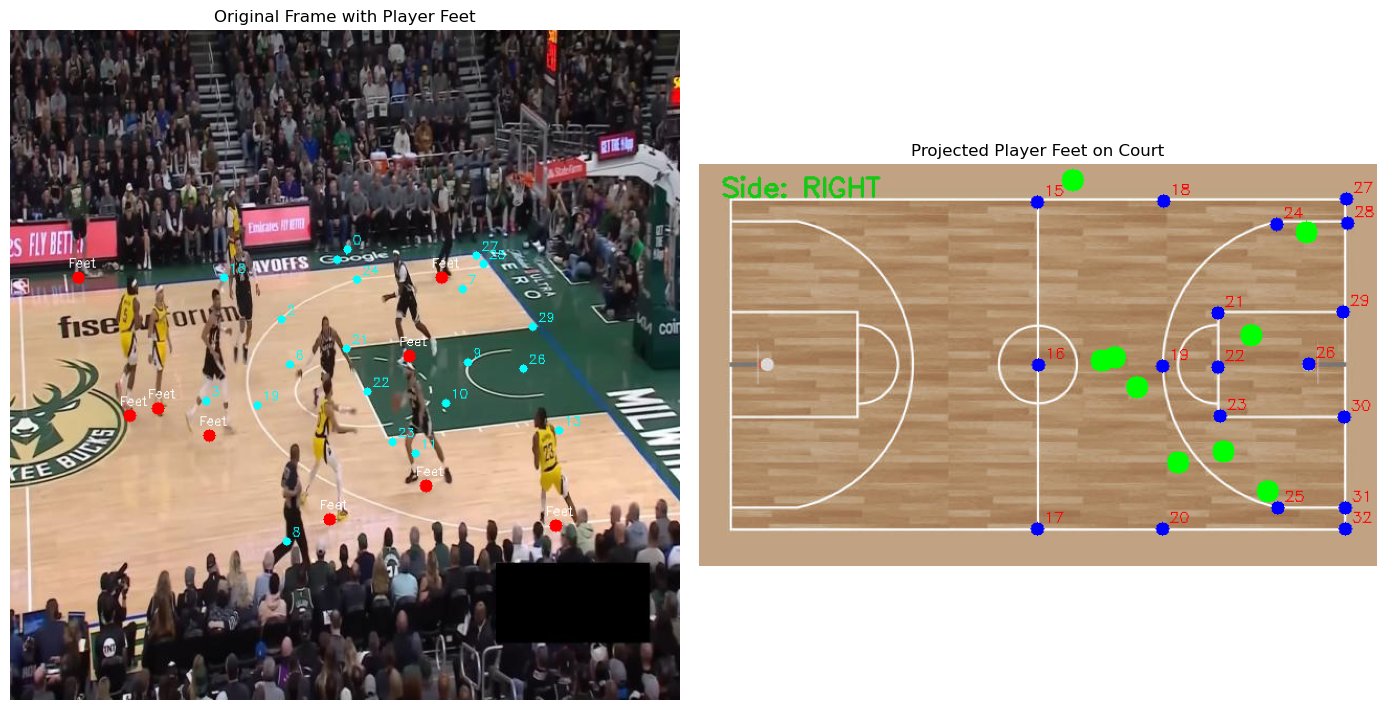

In [59]:
# ===============Processing a single frame=================
path = r'C:\Users\aswin\OneDrive\Desktop\Sandbox\bb_homography\Datasets\basketball-court-detection-2-13\valid\images\indiana-pacers-milwaukee-bucks-game-4-q1-05_10-05_03_mp4-0003_jpg.rf.311c56ead6062e17e386b9322ea807d0.jpg'
original_frame, court_projection, status = process_image(path)
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(original_frame, cv2.COLOR_BGR2RGB))
plt.title("Original Frame with Player Feet")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(court_projection, cv2.COLOR_BGR2RGB))
plt.title("Projected Player Feet on Court")
plt.axis("off")

plt.tight_layout()
plt.show()

Starting batch inference on 5 random images...



0: 640x640 1 court, 363.2ms
Speed: 3.2ms preprocess, 363.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Keypoint counts: Left=13, Right=12


Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.


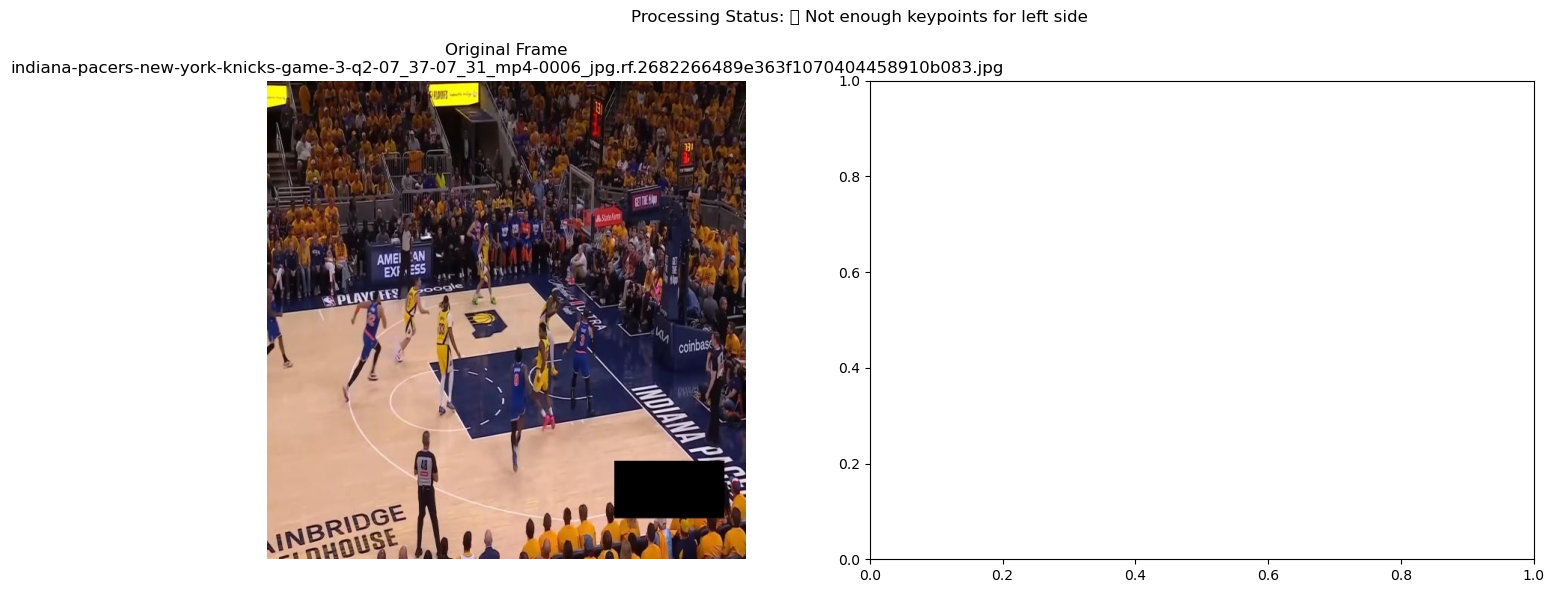


0: 640x640 1 court, 334.6ms
Speed: 2.4ms preprocess, 334.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
Keypoint counts: Left=13, Right=13


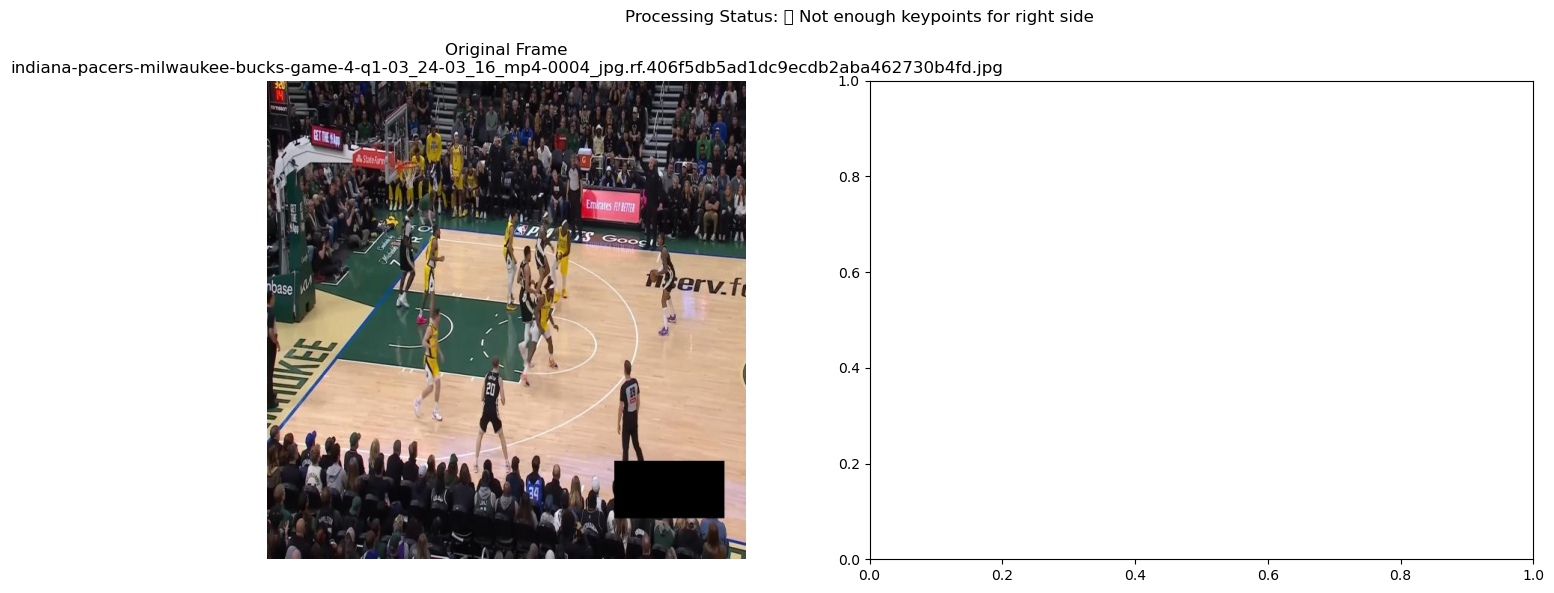


0: 640x640 1 court, 326.7ms
Speed: 1.7ms preprocess, 326.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)
Keypoint counts: Left=3, Right=6

0: 640x640 16 humans, 292.5ms
Speed: 2.7ms preprocess, 292.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.


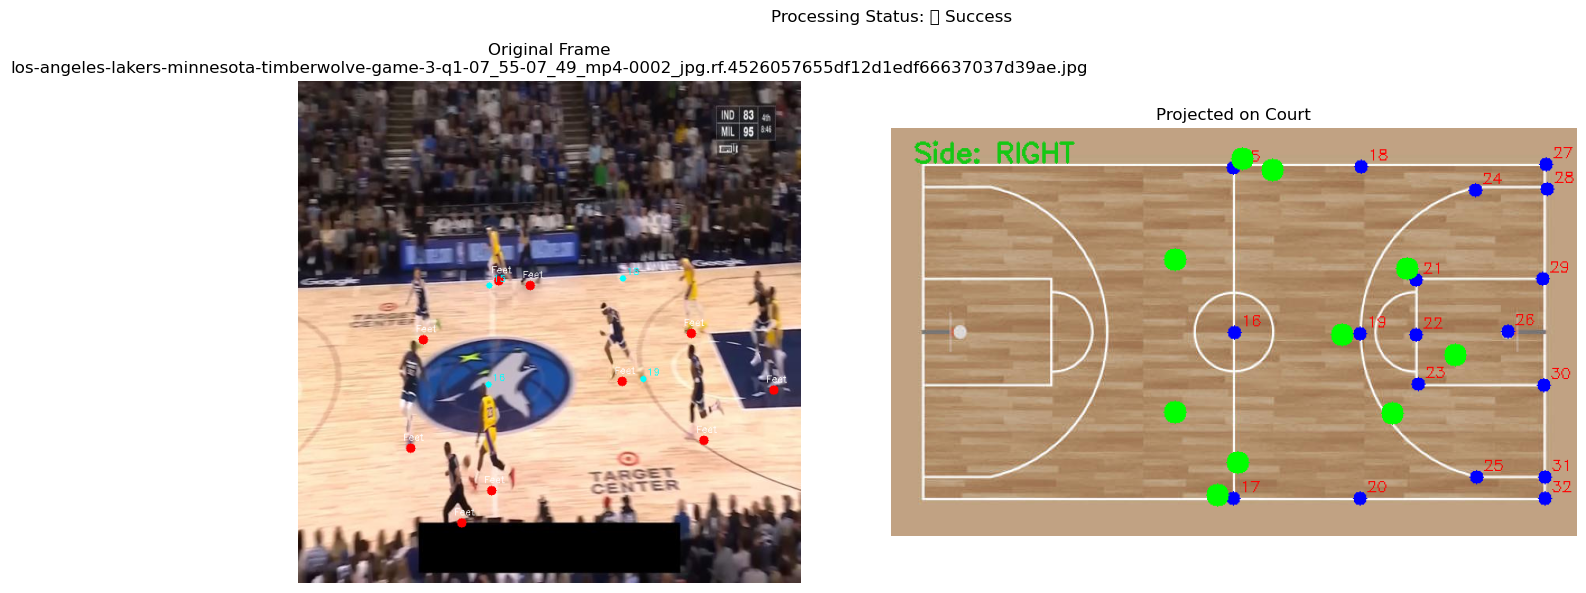


0: 640x640 1 court, 345.6ms
Speed: 2.6ms preprocess, 345.6ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)
Keypoint counts: Left=12, Right=16

0: 640x640 14 humans, 302.0ms
Speed: 1.9ms preprocess, 302.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


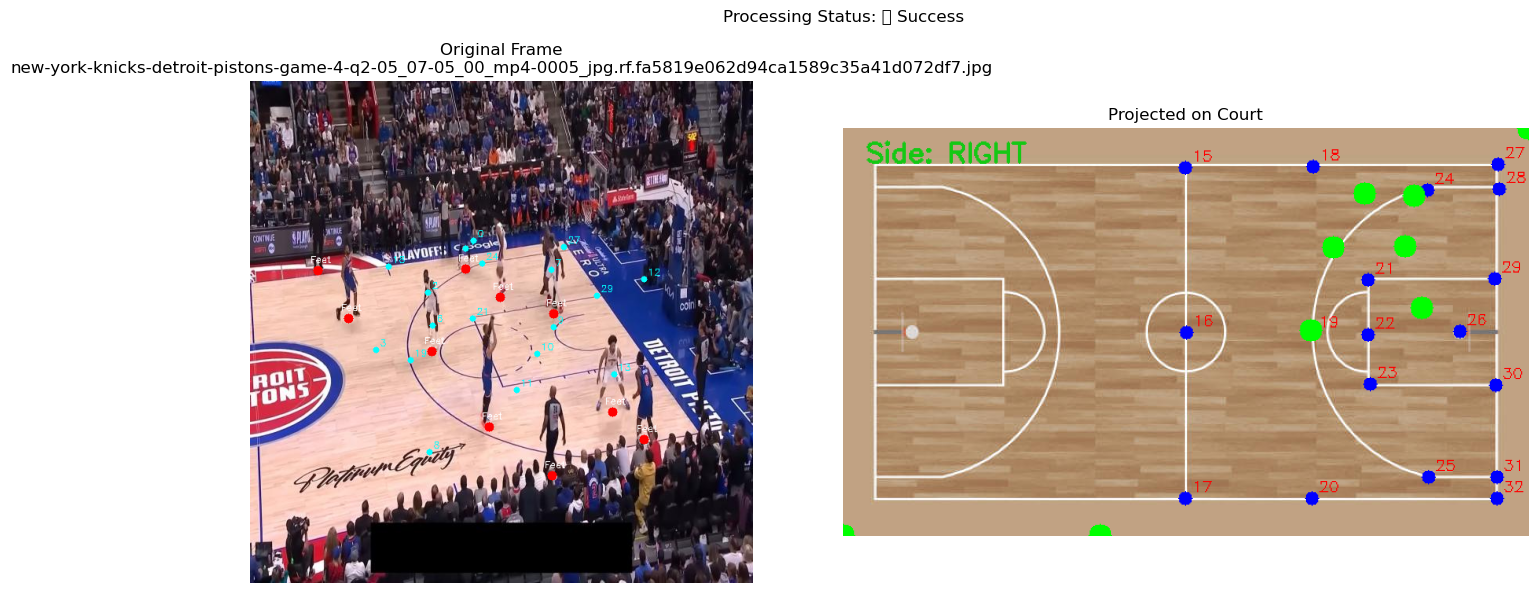


0: 640x640 1 court, 339.8ms
Speed: 3.0ms preprocess, 339.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)
Keypoint counts: Left=12, Right=14


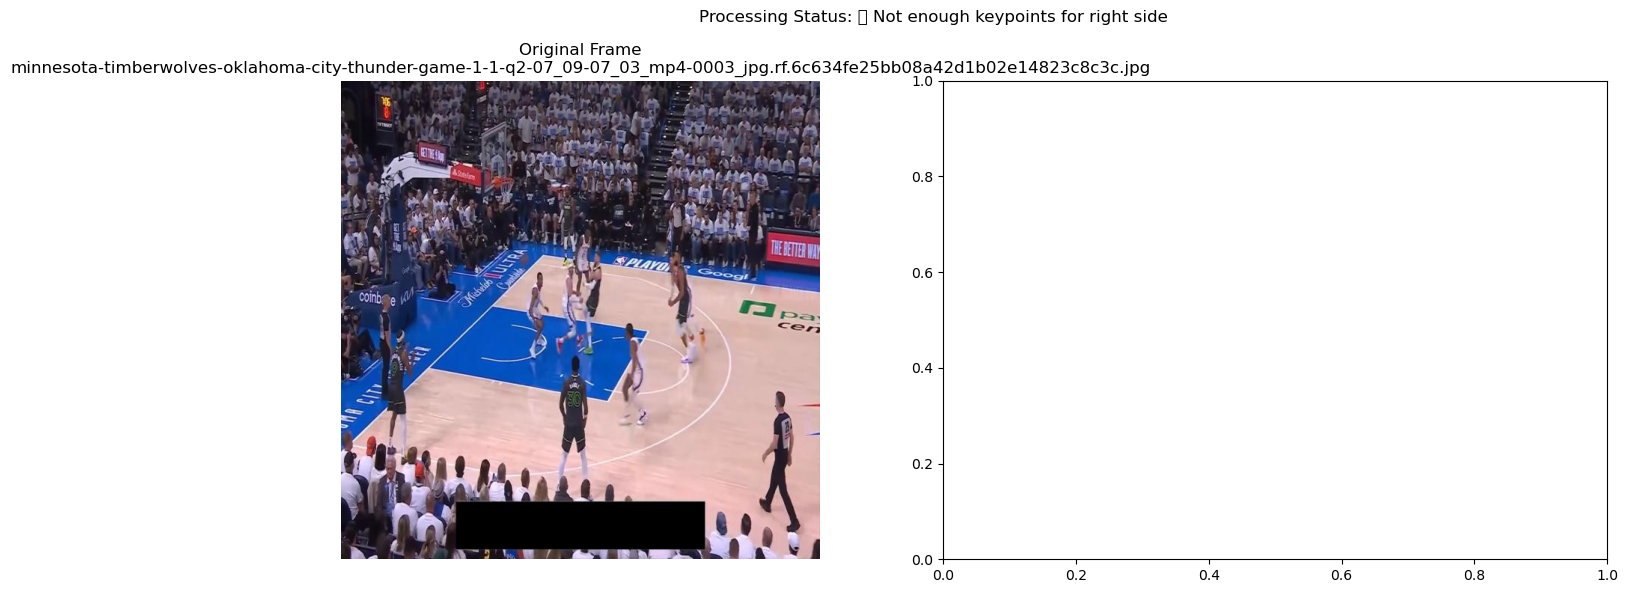

Batch processing complete.


In [56]:
# Test pipeline on random images
image_folder = r'C:\Users\aswin\OneDrive\Desktop\Sandbox\bb_homography\Datasets\basketball-court-detection-2-13\valid\images'
if not os.path.isdir(image_folder):
    raise FileNotFoundError("❌ Image directory not found")

# Get random images
all_images = [os.path.join(image_folder, f) 
             for f in os.listdir(image_folder) 
             if f.lower().endswith(('.jpg', '.png', '.jpeg'))]
random.shuffle(all_images)
images_to_process = all_images[:5]

print("Starting batch inference on 5 random images...")

# Process each image
for path in images_to_process:
    original_frame, court_projection, status = process_image(path)
    
    if original_frame is not None:
        fig, ax = plt.subplots(1, 2, figsize=(14, 6))
        ax[0].imshow(cv2.cvtColor(original_frame, cv2.COLOR_BGR2RGB))
        ax[0].set_title(f"Original Frame\n{os.path.basename(path)}")
        ax[0].axis("off")
        
        if court_projection is not None:
            ax[1].imshow(cv2.cvtColor(court_projection, cv2.COLOR_BGR2RGB))
            ax[1].set_title("Projected on Court")
            ax[1].axis("off")
        
        plt.suptitle(f"Processing Status: {status}")
        plt.tight_layout()
        plt.show()

print("Batch processing complete.")

# **Homography Mapping - Video Input**

**OPENVINO Model Inference**

In [ ]:
# Paths
model_xml = r'C:\Users\aswin\OneDrive\Desktop\Sandbox\bb_homography\Models\openvino_playermodel\best_openvino_model\best.xml'
model_bin = r'C:\Users\aswin\OneDrive\Desktop\Sandbox\bb_homography\Models\openvino_playermodel\best_openvino_model\best.bin'
video_path = r'C:\Users\aswin\OneDrive\Desktop\Sandbox\bb_homography\Assets\basketball game short.mp4'

# Load OpenVINO model
ie = Core()
model = ie.read_model(model=model_xml)
compiled_model = ie.compile_model(model=model, device_name="CPU")
input_layer = compiled_model.input(0)
output_layer = compiled_model.output(0)

# Helper: preprocess frame
def preprocess(frame, input_shape):
    img = cv2.resize(frame, (input_shape[3], input_shape[2]))
    img = img.transpose(2, 0, 1)[np.newaxis, ...]
    img = img.astype(np.float32) / 255.0
    return img

# Helper: postprocess output (YOLOv8 IR format [x1, y1, x2, y2, conf, cls])
def postprocess(pred, conf_thresh=0.4):
    boxes = []
    for det in pred[0]:
        conf = det[4]
        if conf > conf_thresh:
            x1, y1, x2, y2 = det[:4]
            cls_id = int(det[5])
            boxes.append((x1, y1, x2, y2, conf, cls_id))
    return boxes

# === Exponential Moving Average (EMA) for smoothing foot positions ===
ema_alpha = 0.5  # smoothing factor (lower = smoother)
player_ema_positions = {}

# Run inference on video
cap = cv2.VideoCapture(video_path)

# Explicitly set static shape
static_h, static_w = 640, 640
model.reshape({input_layer.any_name: [1, 3, static_h, static_w]})
compiled_model = ie.compile_model(model, "CPU")

input_layer = compiled_model.input(0)
output_layer = compiled_model.output(0)
input_shape = [1, 3, static_h, static_w]
input_shape = input_layer.shape  # [N, C, H, W]

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Preprocess frame
    img = preprocess(frame, input_shape)
    result = compiled_model([img])[output_layer]

    # Get bounding boxes
    boxes = postprocess(result)

    # Draw boxes + stabilize feet
    for idx, (x1, y1, x2, y2, conf, cls_id) in enumerate(boxes):
        # Draw bounding box
        cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0,255,0), 2)
        cv2.putText(frame, f"{cls_id}:{conf:.2f}", (int(x1), int(y1)-10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,255,0), 2)

        # === Compute stabilized foot point ===
        foot_y = y1 + (y2 - y1) * 0.98   # slightly above bbox bottom
        foot_2d = np.array([(x1 + x2) / 2, foot_y])

        # Apply EMA smoothing
        if idx in player_ema_positions:
            prev_foot = np.array(player_ema_positions[idx])
            smoothed_foot = ema_alpha * foot_2d + (1 - ema_alpha) * prev_foot
        else:
            smoothed_foot = foot_2d

        player_ema_positions[idx] = smoothed_foot.tolist()

        # Draw stabilized foot point
        cv2.circle(frame, (int(smoothed_foot[0]), int(smoothed_foot[1])), 5, (0,0,255), -1)

    # Show frame
    cv2.imshow("YOLO OpenVINO Inference (Smoothed)", frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

**ONNX RUNTIME INFERENCE**

In [60]:
# Load ONNX model
session = ort.InferenceSession(r'rfdetrmodel\onnxexport\inference_model_chkpt1.onnx', providers=["CPUExecutionProvider"])

# Get input / output names
input_name = session.get_inputs()[0].name
output_name = session.get_outputs()[0].name


In [61]:
# Load ONNX model
model = onnx.load(r'rfdetrmodel\onnxexport\inference_model_chkpt1.onnx')
graph = model.graph

# Get input tensor details
for inp in graph.input:
    shape = []
    for dim in inp.type.tensor_type.shape.dim:
        if dim.dim_value > 0:
            shape.append(dim.dim_value)
        else:
            shape.append(None)
    print(f"Input: {inp.name}, Shape: {shape}")

# Get output tensor details
for out in graph.output:
    shape = []
    for dim in out.type.tensor_type.shape.dim:
        if dim.dim_value > 0:
            shape.append(dim.dim_value)
        else:
            shape.append(None)
    print(f"Output: {out.name}, Shape: {shape}")


Input: input, Shape: [1, 3, 560, 560]
Output: dets, Shape: [None, None, 4]
Output: labels, Shape: [None, None, 10]


In [ ]:
# Open video
cap = cv2.VideoCapture(r'C:\Users\aswin\OneDrive\Desktop\Sandbox\bb_homography\Assets\basketball game short.mp4')
ret, frame = cap.read()
if not ret:
    raise RuntimeError("Cannot read video")

height, width = frame.shape[:2]  # height=720, width=1280
fps = cap.get(cv2.CAP_PROP_FPS) or 30.0

# Correct VideoWriter: width first, height second
fourcc = cv2.VideoWriter_fourcc(*"mp4v")
out = cv2.VideoWriter(r'C:\Users\aswin\OneDrive\Desktop\Sandbox\bb_homography\Assets\output.mp4',
                      fourcc, fps, (width, height))
if not out.isOpened():
    raise RuntimeError("VideoWriter failed to open. Check codec or file path.")

# Preprocess for model
def preprocess(frame):
    img = cv2.resize(frame, (560, 560))         # resize to model input
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.transpose(2, 0, 1) / 255.0        # HWC -> CHW
    img = np.expand_dims(img, axis=0).astype(np.float32)
    return img

# Postprocess: scale boxes to original frame
def postprocess(preds, frame, conf_thresh=0.5):
    boxes, labels = preds
    boxes = np.squeeze(boxes)
    labels = np.squeeze(labels)

    frame_draw = frame.copy()
    for box, probs in zip(boxes, labels):
        score = np.max(probs)
        cls = np.argmax(probs)
        if score < conf_thresh:
            continue
        # scale boxes from 560x560 -> original frame size
        x1 = int(box[0] * width / 560)
        y1 = int(box[1] * height / 560)
        x2 = int(box[2] * width / 560)
        y2 = int(box[3] * height / 560)
        cv2.rectangle(frame_draw, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(frame_draw, f"{cls}:{score:.2f}", (x1, y1 - 5),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)
    return frame_draw

# Reset video capture to first frame
cap.set(cv2.CAP_PROP_POS_FRAMES, 0)

# Inference loop
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    inp = preprocess(frame)
    boxes, labels = session.run(None, {input_name: inp})
    frame_draw = postprocess((boxes, labels), frame)
    # ensure type uint8
    out.write(frame_draw.astype(np.uint8))

cap.release()
out.release()
cv2.destroyAllWindows()


error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1295: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvDestroyAllWindows'


In [1]:
import yt_dlp

url = "https://www.youtube.com/watch?v=waT_KFeffTs"

ydl_opts = {
    "download_sections": {"*": {"start_time": 237, "end_time": 245}},  # seconds
    "outtmpl": "clip.%(ext)s",  # output file name
    "format": "bestvideo+bestaudio/best",  # best quality
}

with yt_dlp.YoutubeDL(ydl_opts) as ydl:
    ydl.download([url])

[youtube] Extracting URL: https://www.youtube.com/watch?v=waT_KFeffTs
[youtube] waT_KFeffTs: Downloading webpage
[youtube] waT_KFeffTs: Downloading android sdkless player API JSON
[youtube] waT_KFeffTs: Downloading tv client config
[youtube] waT_KFeffTs: Downloading player 25f1a420-main
[youtube] waT_KFeffTs: Downloading tv player API JSON
[youtube] waT_KFeffTs: Downloading web safari player API JSON


[youtube] waT_KFeffTs: Downloading m3u8 information
[info] waT_KFeffTs: Downloading 1 format(s): 399+251
[download] Destination: clip.f399.mp4
[download] 100% of  228.46MiB in 00:00:20 at 11.32MiB/s    
[download] Destination: clip.f251.webm
[download] 100% of    7.04MiB in 00:00:02 at 2.57MiB/s   
[Merger] Merging formats into "clip.webm"
Deleting original file clip.f399.mp4 (pass -k to keep)
Deleting original file clip.f251.webm (pass -k to keep)
